In [1]:
%matplotlib inline

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

import matplotlib.pyplot as plt

import numpy as np
from scipy.special import comb

Loading BokehJS ...

## Likelihood of a coin being fair


$$
P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}
$$

Here, $P(X|\theta)$ is the likelihood, $P(\theta)$ is the prior on theta, $P(X)$ is the evidence, while $P(\theta|X)$ is the posteior. 

Now the probability of observing $k$ heads out of $n$ trials, given that the probability of a fair coin is $\theta$ is given as follows: 

$P(N_{heads}=k|n,\theta) = \frac{n!}{k!(n-k)!}\theta^{k}(1-\theta)^{(n-k)}$

Consider, $n=10$ and $k=9$. Now, we can plot our likelihood. as follows:

In [2]:
def get_likelihood(theta, n, k, normed=False):
    ll = (theta**k)*((1-theta)**(n-k))
    if normed:
        num_combs = comb(n, k)
        ll = num_combs*ll
    return ll

In [3]:
get_likelihood(0.5, 2, 2, normed=True)

0.25

In [4]:
get_likelihood(0.5, 10, np.arange(10), normed=True)

array([ 0.00097656,  0.00976562,  0.04394531,  0.1171875 ,  0.20507812,
        0.24609375,  0.20507812,  0.1171875 ,  0.04394531,  0.00976562])

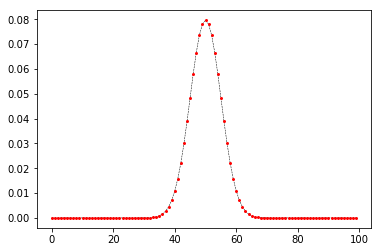

In [5]:
N = 100
plt.plot(
    np.arange(N),
    get_likelihood(0.5, N, np.arange(N), normed=True),
    color='k', markeredgecolor='none', marker='o',
    linestyle="--", ms=3, markerfacecolor='r', lw=0.5
)

In [6]:
n, k = 10, 6
theta=np.arange(0,1,0.01)
ll = get_likelihood(theta, n, k, normed=True)

source = ColumnDataSource(data=dict(
    theta=theta,
    ll=ll,
))

hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("theta", "$x"),
    ("ll", "$y"),
])


p1 = figure(plot_width=600, plot_height=400,
            tools=[hover], title="Likelihood of fair coin")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'theta'
p1.yaxis.axis_label = 'Likelihood'

p1.line('theta', 'll', color='#A6CEE3', source=source)

# get a handle to update the shown cell with
handle = show(p1, notebook_handle=True)
handle

## Plot for multiple data

In [7]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("theta", "$x"),
    ("ll_ratio", "$y"),
])


p1 = figure(plot_width=600, plot_height=400,
            #y_axis_type="log",
            tools=[hover], title="Likelihood ratio compared to unbiased coin")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'theta'
p1.yaxis.axis_label = 'Likelihood ratio wrt theta = 0.5'


theta=np.arange(0,1,0.01)
for n, k, color in zip(
    [10, 100, 500],
    [6, 60, 300],
    ["red", "blue", "black"]
):
    ll_unbiased = get_likelihood(0.5, n, k, normed=False)
    ll = get_likelihood(theta, n, k, normed=False)
    ll_ratio = ll / ll_unbiased

    source = ColumnDataSource(data=dict(
        theta=theta,
        ll_ratio=ll_ratio,
    ))

    p1.line('theta', 'll_ratio',
            color=color, source=source,
            legend="n={}, k={}".format(n,k))

# get a handle to update the shown cell with
handle = show(p1, notebook_handle=True)
handle

In [8]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("theta", "$x"),
    ("ll_ratio", "$y"),
])


p1 = figure(plot_width=600, plot_height=400,
            y_axis_type="log",
            tools=[hover], title="Likelihood ratio compared to unbiased coin")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'n'
p1.yaxis.axis_label = 'Likelihood ratio wrt theta = 0.5'

n = 10**np.arange(0,6)
k = (n*0.6).astype(int)

theta=0.6


ll_unbiased = get_likelihood(0.5, n, k, normed=False)
ll = get_likelihood(theta, n, k, normed=False)
ll_ratio = ll / ll_unbiased

source = ColumnDataSource(data=dict(
    n=n,
    ll_ratio=ll_ratio,
))

p1.line('n', 'll_ratio',
        color=color, source=source,
        legend="theta={:.2f}".format(theta))

# get a handle to update the shown cell with
handle = show(p1, notebook_handle=True)
handle

/homed/content/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in true_divide
